In [44]:
import os
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def visualize_optical_flow(video_path, L=5):
    cap = cv.VideoCapture(video_path)
    ret, first_frame = cap.read()
    if not ret:
        print("Failed to read the video")
        cap.release()
        return

    prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
    mask = np.zeros_like(first_frame)
    mask[..., 1] = 255  # Set saturation to maximum

    fig, ax = plt.subplots()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
        rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)

        ax.imshow(cv.cvtColor(rgb, cv.COLOR_BGR2RGB))
        display(fig)
        clear_output(wait=True)
        prev_gray = gray

    cap.release()
    plt.close()

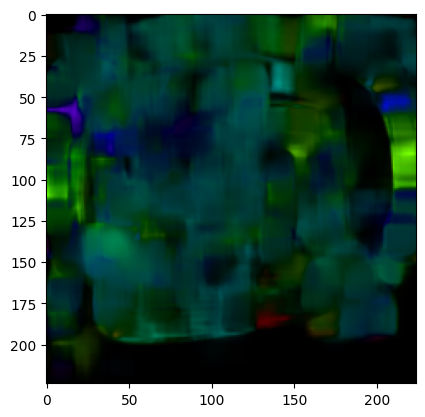

In [45]:
def select_random_video(video_directory, file_extension='.mp4'):
    video_files = [f for f in os.listdir(video_directory) if f.endswith(file_extension)]
    if not video_files:
        print("No video files found in the directory.")
        return None
    return os.path.join(video_directory, random.choice(video_files))

# Example usage
video_directory = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Videos_postprocessed"
selected_video_path = select_random_video(video_directory)
if selected_video_path:
    visualize_optical_flow(selected_video_path)